In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import register_matplotlib_converters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

In [74]:
df = pd.read_csv('../../dataset1/time_series_covid19_confirmed_global.csv')
data = df.iloc[:, 4:]
state = df.iloc[:,0]
country = df.iloc[:,1]
last_data = data.iloc[:, -1]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
280    NaN
281    NaN
282    NaN
283    NaN
284    NaN
Name: Province/State, Length: 285, dtype: object

In [75]:
index = 64 # 64 83 145 217 218 255 92
print("选择的国家是：{}".format(country[index]))
print("选择的地区是：{}".format(state[index]))

选择的国家是：China
选择的地区是：Guangdong


In [76]:
series = []

rows = list(range(59, 71)) + list(range(73, 89)) + list(range(90, 93))
china_data = data.iloc[rows,:].diff(axis=1).iloc[:, 1:]

for row_index, row in china_data.iterrows():
    daily = data.loc[row_index].diff()
    daily = daily.to_numpy()
    length = len(daily)
    start_date = 0
    # series = np.expand_dims(daily[start_date: start_date + 10], axis=0)
    # start_date += 5
    print(series)
    while (start_date < length-10):
        daily_data = np.asarray(daily[start_date: start_date + 10])
        series.append(np.nan_to_num(daily_data))
        start_date += 5

series

[]
[array([ 0.,  8.,  6., 24., 21., 10., 36., 46., 48., 37.]), array([10., 36., 46., 48., 37., 60., 43., 68., 72., 50.]), array([60., 43., 68., 72., 50., 61., 74., 68., 46., 51.]), array([61., 74., 68., 46., 51., 30., 29., 21., 24., 16.]), array([30., 29., 21., 24., 16., 12., 11.,  9.,  4.,  1.]), array([12., 11.,  9.,  4.,  1.,  1.,  1.,  0.,  0.,  0.]), array([1., 1., 0., 0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [77]:
series_pd = pd.DataFrame(series)
series_pd

,0,1,2,3,4,5,6,7,8,9
0,0.0,8.0,6.0,24.0,21.0,10.0,36.0,46.0,48.0,37.0
1,10.0,36.0,46.0,48.0,37.0,60.0,43.0,68.0,72.0,50.0
2,60.0,43.0,68.0,72.0,50.0,61.0,74.0,68.0,46.0,51.0
3,61.0,74.0,68.0,46.0,51.0,30.0,29.0,21.0,24.0,16.0
4,30.0,29.0,21.0,24.0,16.0,12.0,11.0,9.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5234,15.0,10.0,12.0,14.0,8.0,17.0,46.0,32.0,8.0,0.0
5235,17.0,46.0,32.0,8.0,0.0,2.0,0.0,3.0,10.0,0.0
5236,2.0,0.0,3.0,10.0,0.0,2.0,1.0,1.0,0.0,2.0
5237,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0


In [78]:
def load_embeddings(wine_raw):
#     """
#     Loading the wine dataset in pandas dataframe
#     :return: scaled data
#     """
#     # loading wine dataset
#     wine_raw = pd.read_csv("./data/wine-clustering.csv")

#     # checking data shape
#     row, col = wine_raw.shape
#     print(f'There are {row} rows and {col} columns') 
#     print(wine_raw.head(10))

    # to work on copy of the data
    wine_raw_scaled = wine_raw.copy()

    # Scaling the data to keep the different attributes in same range.
    wine_raw_scaled[wine_raw_scaled.columns] = StandardScaler().fit_transform(wine_raw_scaled)
    print(wine_raw_scaled.describe())

    return wine_raw_scaled


def pca_embeddings(df_scaled):
    """To reduce the dimensions of the wine dataset we use Principal Component Analysis (PCA).
    Here we reduce it from 13 dimensions to 2.

    :param df_scaled: scaled data
    :return: pca result, pca for plotting graph
    """

    pca_2 = PCA(n_components=2)
    pca_2_result = pca_2.fit_transform(df_scaled)
    print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
    print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
        np.sum(pca_2.explained_variance_ratio_)))

    # Results from pca.components_
    dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_scaled.columns, index=['PC_1', 'PC_2'])
    print('\n\n', dataset_pca)
    
    print("\n*************** Most important features *************************")
    print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
    print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
    print("\n******************************************************************")

    return pca_2_result, pca_2


def kmean_hyper_param_tuning(data):
    """
    Hyper parameter tuning to select the best from all the parameters on the basis of silhouette_score.

    :param data: dimensionality reduced data after applying PCA
    :return: best number of clusters for the model (used for KMeans n_clusters)
    """
    # candidate values for our number of cluster
#     parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
    parameters = [3, 4, 5, 10, 15, 20, 25, 30, 35, 40]

    # instantiating ParameterGrid, pass number of clusters as input
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()     # instantiating KMeans model
    silhouette_scores = []

    # evaluation based on silhouette_score
    for p in parameter_grid:
        kmeans_model.set_params(**p)    # set current hyper parameter
        kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p

        ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
        silhouette_scores += [ss]       # store all the scores

        print('Parameter:', p, 'Score', ss)

        # check p which has the best score
        if ss > best_score:
            best_score = ss
            best_grid = p

    # plotting silhouette score
    plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), list(parameters))
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

    return best_grid['n_clusters']


def visualizing_results(pca_result, label, centroids_pca):
    """ Visualizing the clusters

    :param pca_result: PCA applied data
    :param label: K Means labels
    :param centroids_pca: PCA format K Means centroids
    """
    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, c=label, alpha=0.5, s=200)  # plot different colors per cluster
    plt.title('Wine clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

    plt.show()

In [79]:
print("1. Loading Wine dataset\n")
data_scaled = load_embeddings(series_pd)

1. Loading Wine dataset

                  0             1             2             3             4  \
count  5.239000e+03  5.239000e+03  5.239000e+03  5.239000e+03  5.239000e+03   
mean   3.996255e-16  9.220054e-16 -1.247849e-15  8.658585e-17 -4.980454e-16   
std    1.000095e+00  1.000095e+00  1.000095e+00  1.000095e+00  1.000095e+00   
min   -6.193522e-02 -1.346080e-01 -7.987556e-02 -1.016080e-01 -7.618139e+00   
25%   -6.193522e-02 -7.790762e-02 -6.837287e-02 -5.731115e-02 -6.584881e-02   
50%   -6.193522e-02 -7.790762e-02 -6.837287e-02 -5.731115e-02 -6.584881e-02   
75%   -5.204379e-02 -6.373251e-02 -5.687017e-02 -4.845177e-02 -5.302659e-02   
max    4.169970e+01  3.422585e+01  3.540594e+01  4.857180e+01  4.601722e+01   

                  5             6             7             8             9  
count  5.239000e+03  5.239000e+03  5.239000e+03  5.239000e+03  5.239000e+03  
mean  -1.344379e-15 -1.268015e-15 -1.068576e-15  3.819610e-16 -1.159334e-15  
std    1.000095e+00  1.000095

In [80]:
print("\n\n2. Reducing via PCA\n")
pca_result, pca_2 = pca_embeddings(data_scaled)



2. Reducing via PCA

Explained variation per principal component: [0.71769454 0.08772726]
Cumulative variance explained by 2 principal components: 80.54%


              0         1         2         3         4         5         6  \
PC_1  0.272961  0.353970  0.355347  0.294802  0.295717  0.319515  0.357111   
PC_2  0.364349  0.174123  0.113781  0.309113  0.211303  0.149828  0.144558   

             7         8         9  
PC_1  0.339594  0.300616  0.253489  
PC_2  0.222068  0.334107  0.692458  

*************** Most important features *************************
As per PC 1:
 1    0.353970
2    0.355347
5    0.319515
6    0.357111
7    0.339594
8    0.300616
Name: PC_1, dtype: float64


As per PC 2:
 0    0.364349
3    0.309113
8    0.334107
9    0.692458
Name: PC_2, dtype: float64

******************************************************************




3. HyperTuning the Parameter for KMeans

Parameter: {'n_clusters': 3} Score 0.9941933205661069
Parameter: {'n_clusters': 4} Score 0.9942786382738732
Parameter: {'n_clusters': 5} Score 0.9937607324199934
Parameter: {'n_clusters': 10} Score 0.9931136006556689
Parameter: {'n_clusters': 15} Score 0.9324964350544769
Parameter: {'n_clusters': 20} Score 0.8353553369672387
Parameter: {'n_clusters': 25} Score 0.7888892114612654
Parameter: {'n_clusters': 30} Score 0.7662083913705371
Parameter: {'n_clusters': 35} Score 0.6683153362112756
Parameter: {'n_clusters': 40} Score 0.6761065400744544


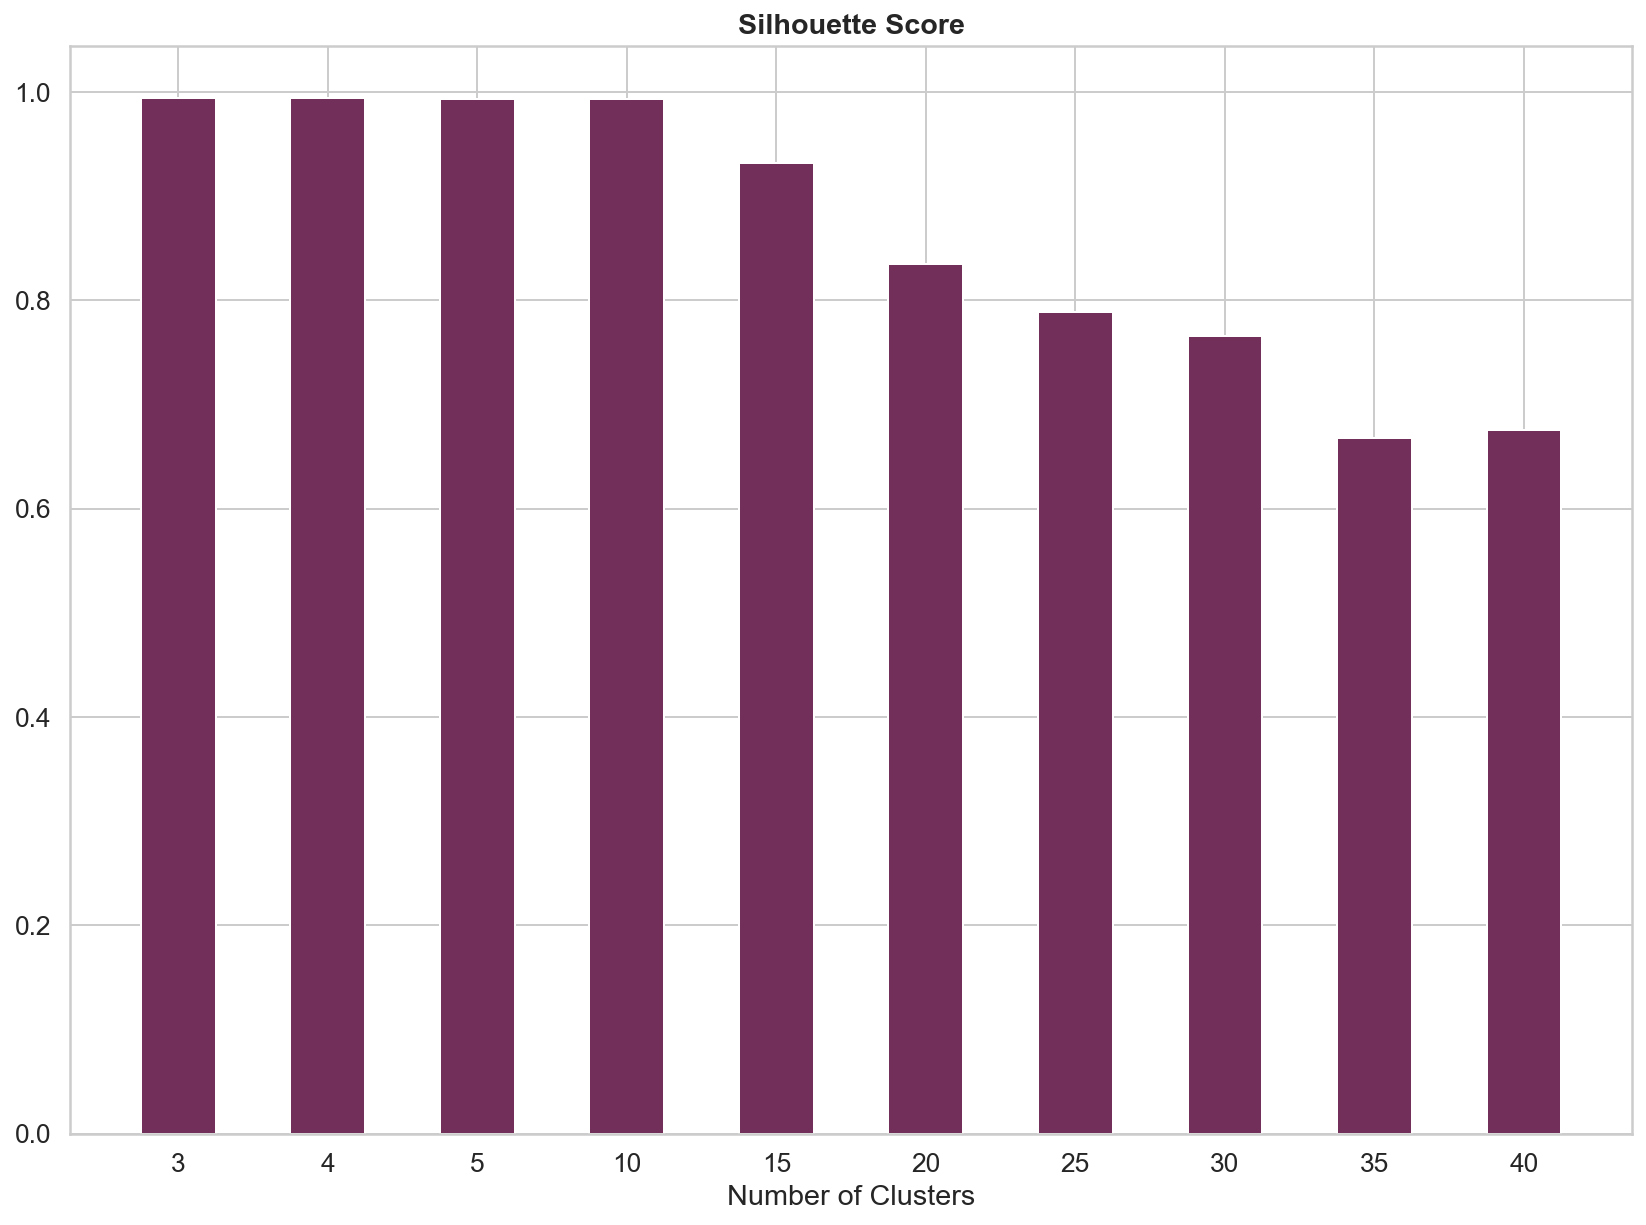

optimum num of clusters = 4


In [81]:
print("\n\n3. HyperTuning the Parameter for KMeans\n")
optimum_num_clusters = kmean_hyper_param_tuning(data_scaled)
print("optimum num of clusters =", optimum_num_clusters)

In [82]:
# fitting KMeans
# kmeans = KMeans(n_clusters=optimum_num_clusters)
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)



4. Visualizing the data


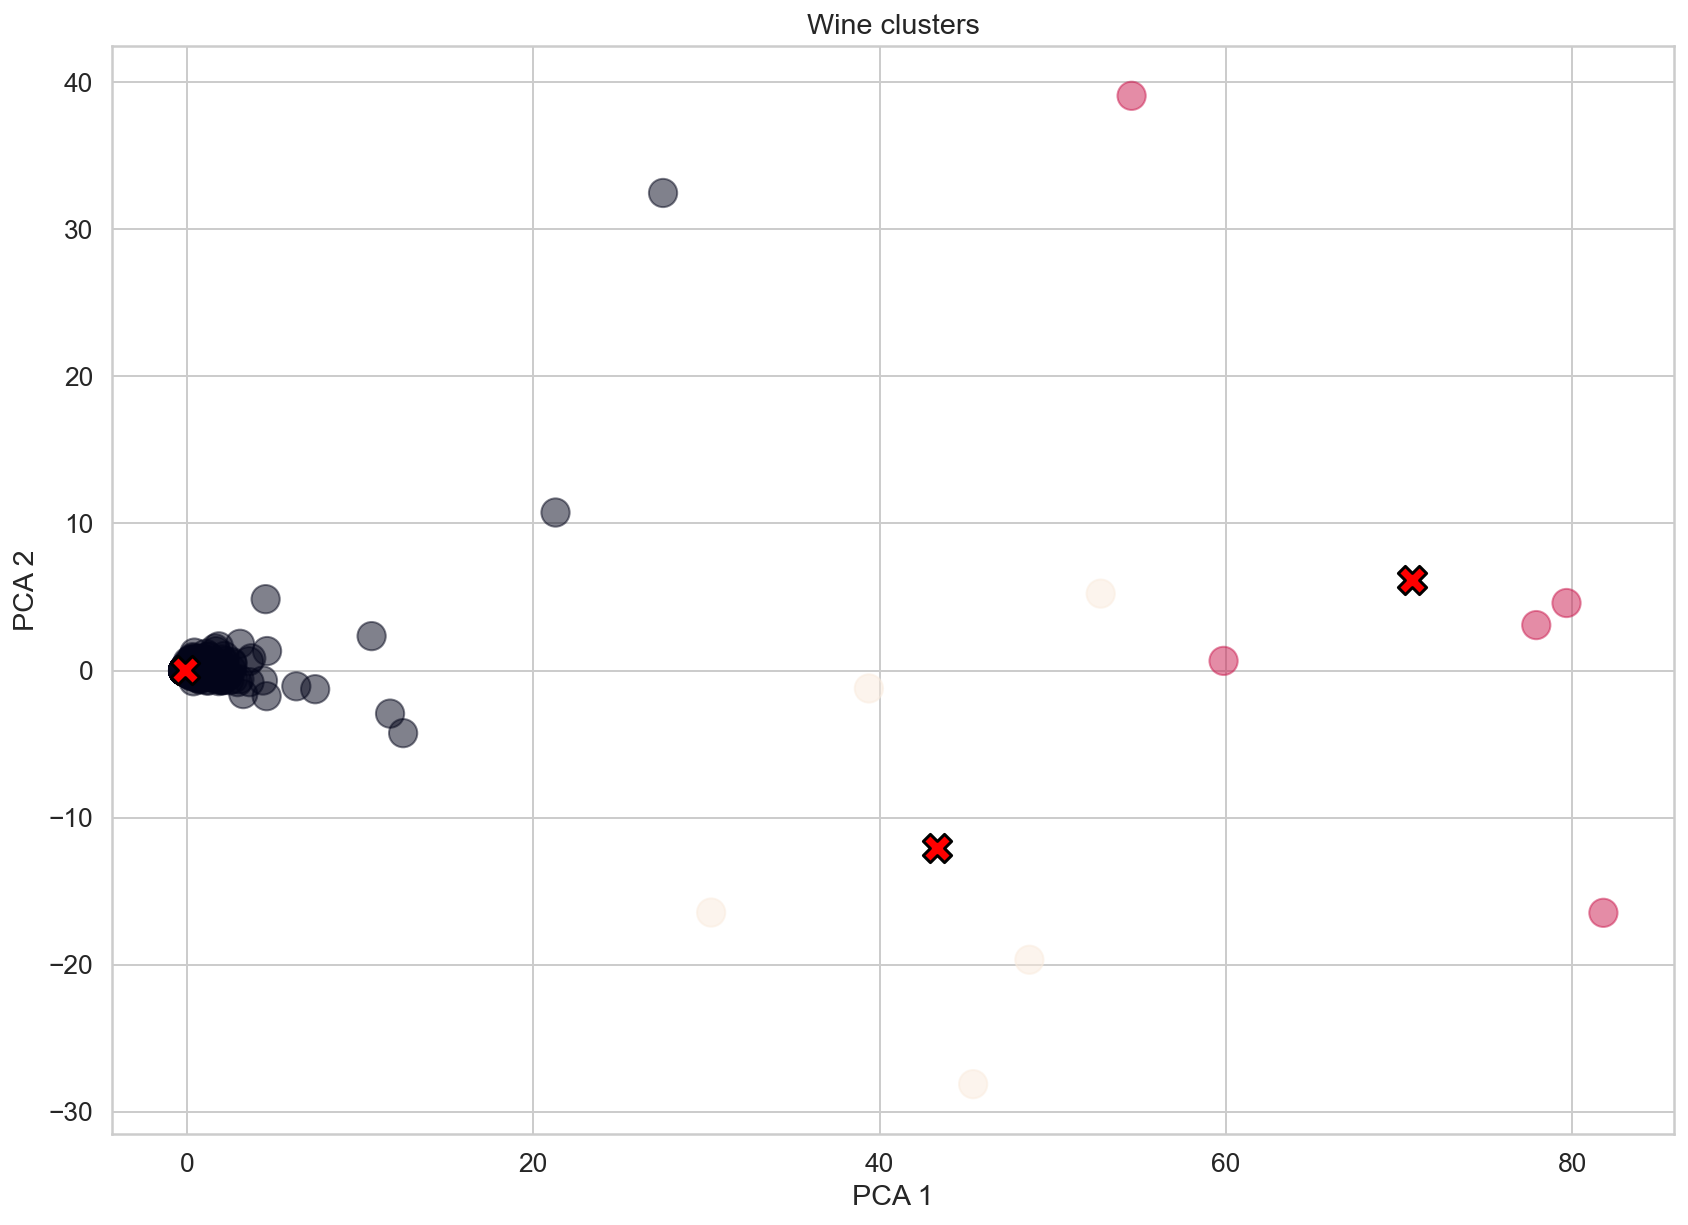

In [83]:
print("\n\n4. Visualizing the data")
visualizing_results(pca_result, kmeans.labels_, centroids_pca)

In [84]:
pca_result

array([[ 6.38499879e-01,  4.90705522e-01],
       [ 1.47837401e+00,  4.07016909e-01],
       [ 1.94445035e+00,  7.37512625e-02],
       ...,
       [-1.44451301e-01, -2.51859223e-02],
       [-1.81429955e-01, -4.70871275e-03],
       [-1.95279189e-01, -4.80556949e-05]])

In [85]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
series_pd_scaled = series_pd.copy()
series_pd_scaled[series_pd_scaled.columns] = StandardScaler().fit_transform(series_pd_scaled)
print(series_pd_scaled.describe())

                  0             1             2             3             4  \
count  5.239000e+03  5.239000e+03  5.239000e+03  5.239000e+03  5.239000e+03   
mean   3.996255e-16  9.220054e-16 -1.247849e-15  8.658585e-17 -4.980454e-16   
std    1.000095e+00  1.000095e+00  1.000095e+00  1.000095e+00  1.000095e+00   
min   -6.193522e-02 -1.346080e-01 -7.987556e-02 -1.016080e-01 -7.618139e+00   
25%   -6.193522e-02 -7.790762e-02 -6.837287e-02 -5.731115e-02 -6.584881e-02   
50%   -6.193522e-02 -7.790762e-02 -6.837287e-02 -5.731115e-02 -6.584881e-02   
75%   -5.204379e-02 -6.373251e-02 -5.687017e-02 -4.845177e-02 -5.302659e-02   
max    4.169970e+01  3.422585e+01  3.540594e+01  4.857180e+01  4.601722e+01   

                  5             6             7             8             9  
count  5.239000e+03  5.239000e+03  5.239000e+03  5.239000e+03  5.239000e+03  
mean  -1.344379e-15 -1.268015e-15 -1.068576e-15  3.819610e-16 -1.159334e-15  
std    1.000095e+00  1.000095e+00  1.000095e+00  1.000

In [87]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(series_pd_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
        np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.71769454 0.08772726]
Cumulative variance explained by 2 principal components: 80.54%


In [88]:
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=series_pd_scaled.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)
    
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")



              0         1         2         3         4         5         6  \
PC_1  0.272961  0.353970  0.355347  0.294802  0.295717  0.319515  0.357111   
PC_2  0.364349  0.174123  0.113781  0.309113  0.211303  0.149828  0.144558   

             7         8         9  
PC_1  0.339594  0.300616  0.253489  
PC_2  0.222068  0.334107  0.692458  

*************** Most important features *************************
As per PC 1:
 1    0.353970
2    0.355347
5    0.319515
6    0.357111
7    0.339594
8    0.300616
Name: PC_1, dtype: float64


As per PC 2:
 0    0.364349
3    0.309113
8    0.334107
9    0.692458
Name: PC_2, dtype: float64

******************************************************************




3. HyperTuning the Parameter for KMeans

Parameter: {'n_clusters': 3} Score 0.9940482175070645
Parameter: {'n_clusters': 4} Score 0.994266339785819
Parameter: {'n_clusters': 5} Score 0.9940158360806745
Parameter: {'n_clusters': 10} Score 0.9917299063150125
Parameter: {'n_clusters': 15} Score 0.9324964350544769
Parameter: {'n_clusters': 20} Score 0.8260058754553564
Parameter: {'n_clusters': 25} Score 0.7835746840965149
Parameter: {'n_clusters': 30} Score 0.7511093866465717
Parameter: {'n_clusters': 35} Score 0.6904214956363688
Parameter: {'n_clusters': 40} Score 0.6927923014262835


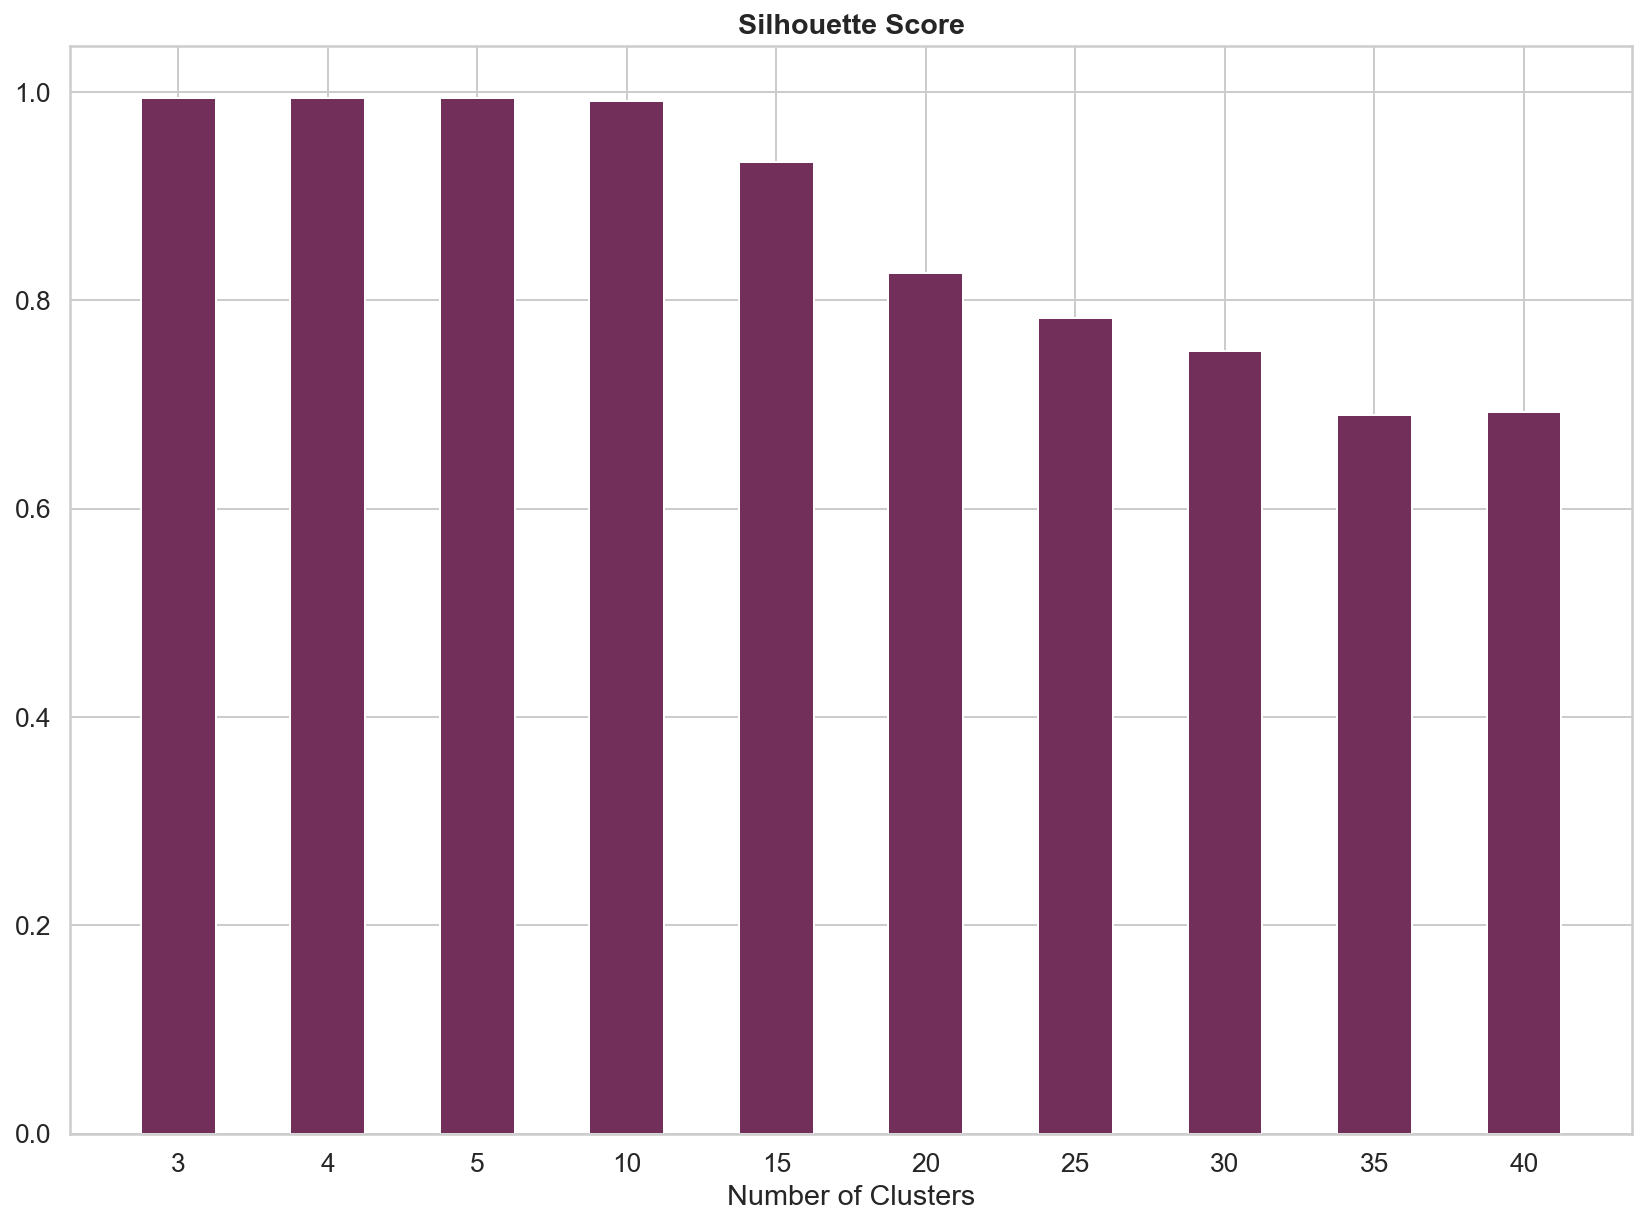

optimum num of clusters = 4


In [89]:
print("\n\n3. HyperTuning the Parameter for KMeans\n")
optimum_num_clusters = kmean_hyper_param_tuning(series_pd_scaled)
print("optimum num of clusters =", optimum_num_clusters)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


array([0, 0, 0, ..., 0, 0, 0])

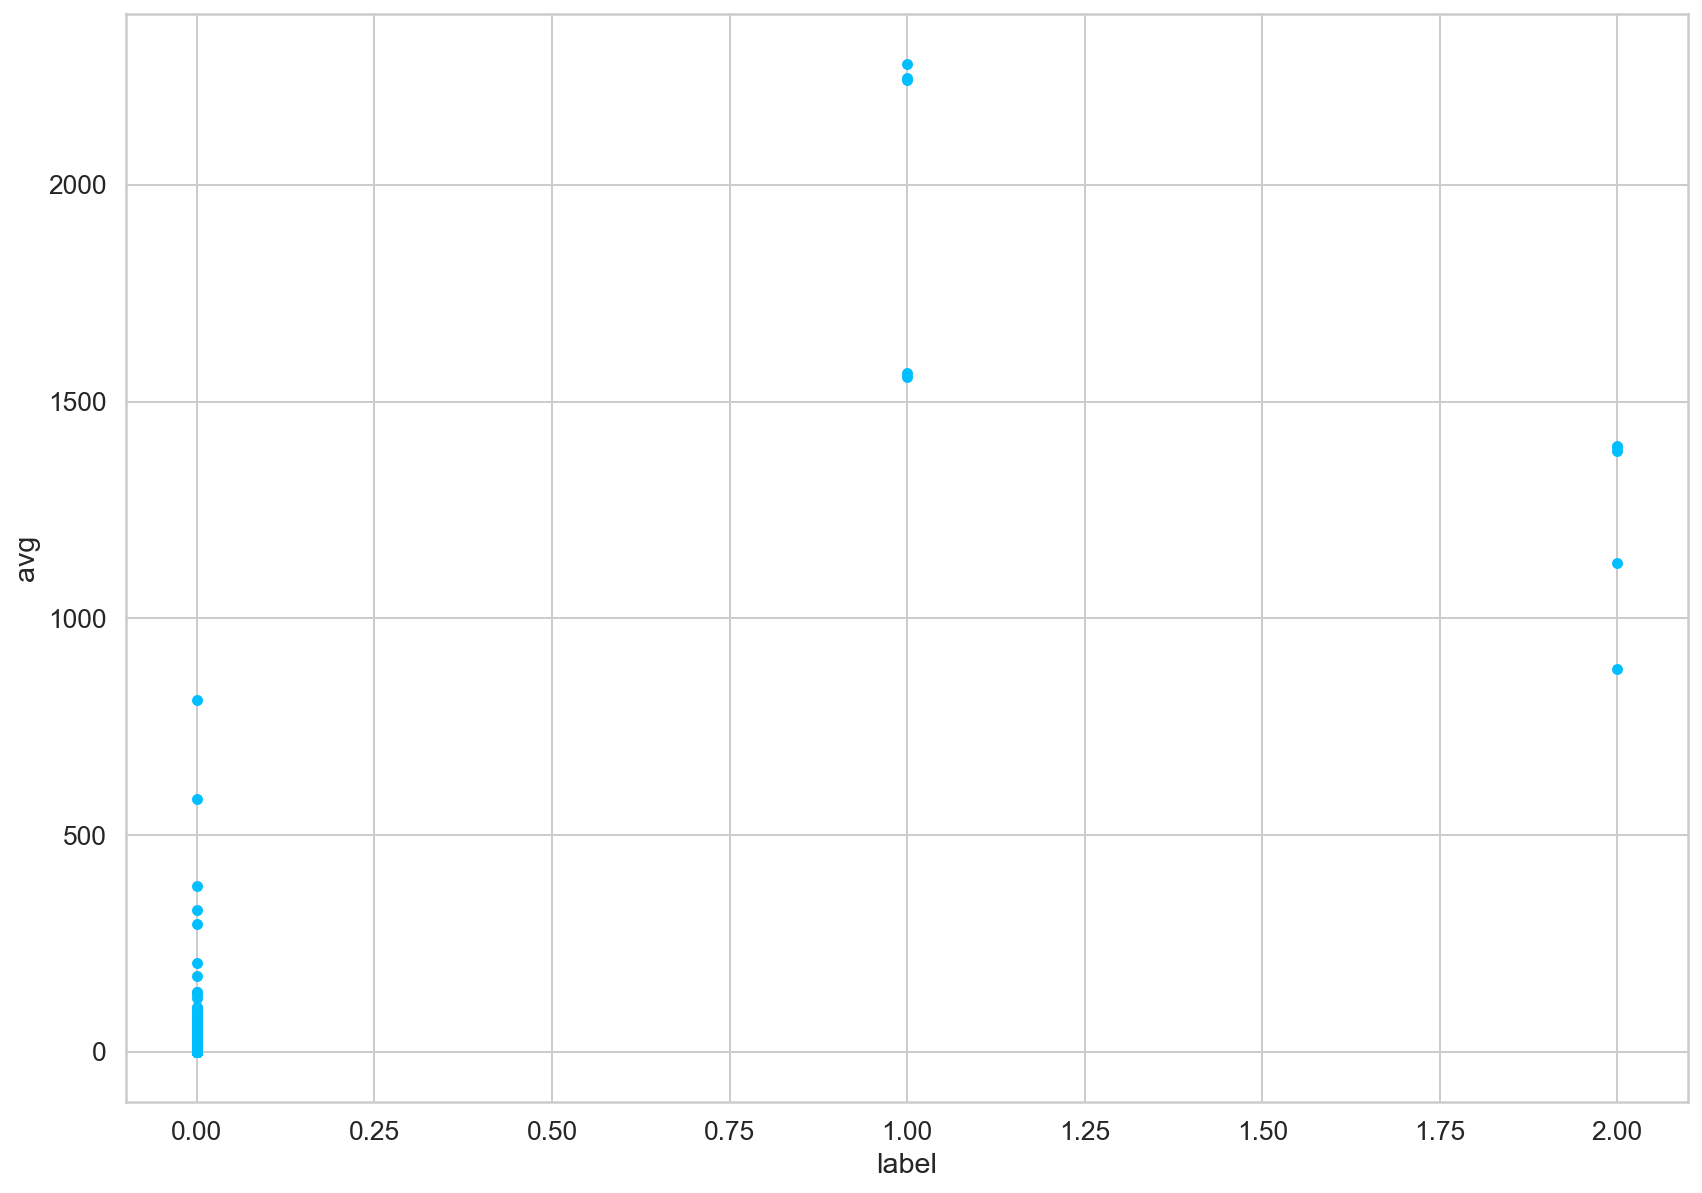

In [90]:
# 验证

avg_list = series_pd.T.mean()
result = kmeans.labels_

test = pd.DataFrame({'label': result, 'avg': avg_list})

test.plot.scatter(x='label', y='avg')

result